In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [44]:
data = pd.read_csv('crimedata.csv')
data

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,?,?,10,56216,3.07,6.87,61.68,15.23,...,1376,2268.72,2563,4225.82,489,806.25,34,56.06,545.75,7356.84
2211,Pinevillecity,LA,?,?,10,12251,2.68,21.18,76.65,1.52,...,104,860.43,574,4748.9,24,198.56,2,16.55,124.1,5824.44
2212,Yucaipacity,CA,?,?,10,32824,2.46,0.52,92.62,0.98,...,628,1709.26,895,2435.97,179,487.19,8,21.77,353.83,4654.2
2213,Beevillecity,TX,?,?,10,13547,2.89,3.37,69.91,0.90,...,192,1508.01,474,3722.9,13,102.1,1,7.85,691.17,5340.87


In [45]:
data.shape

(2215, 147)

In [46]:
data.describe()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop
count,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,...,61.539630,51.538596,77.411079,88.111865,27.419955,2783.835034,3.041124,0.980163,7.764786,5.859296
std,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,...,16.750061,10.517926,10.878186,7.287836,109.822600,2828.993341,4.912917,2.877128,58.166468,9.156829
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,...,6.750000,11.830000,27.950000,32.830000,0.900000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,...,50.110000,44.995000,72.060000,85.200000,7.300000,1181.900000,0.360000,0.000000,0.000000,0.000000
50%,5.000000,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,...,64.490000,52.170000,79.490000,90.030000,13.700000,2027.300000,1.220000,0.000000,1.000000,2.170000
75%,8.000000,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,...,74.855000,58.740000,85.135000,93.010000,26.100000,3321.700000,3.365000,0.000000,3.000000,8.365000
max,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,...,93.140000,78.560000,96.590000,99.900000,3569.800000,44229.900000,54.330000,48.440000,1946.000000,91.090000


In [47]:
data.columns.tolist()

['communityname',
 'state',
 'countyCode',
 'communityCode',
 'fold',
 'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumKidsBornNeverMar',
 'PctKidsBornNeverMar',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmig

In [48]:
data['communityname'].nunique()

2018

In [49]:
data['state'].nunique()

48

In [50]:
df = data[['state',
           'fold',
           'population',
           'numbUrban',
           'NumUnderPov',
           'NumKidsBornNeverMar',
           'murders',
           'NumImmig',
           'NumInShelters',
           'HousVacant',
           'NumStreet',
           'PctUsePubTrans',
           'murdPerPop',
           'PopDens',
           'LandArea',
           'PctKidsBornNeverMar',
           'LemasPctOfficDrugUn',
           'racePctWhite',
           'PctVacantBoarded',
           'PctHousOwnOcc',
           'PctPersOwnOccup',
           'PctRecImmig10']]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                2215 non-null   object 
 1   fold                 2215 non-null   int64  
 2   population           2215 non-null   int64  
 3   numbUrban            2215 non-null   int64  
 4   NumUnderPov          2215 non-null   int64  
 5   NumKidsBornNeverMar  2215 non-null   int64  
 6   murders              2215 non-null   int64  
 7   NumImmig             2215 non-null   int64  
 8   NumInShelters        2215 non-null   int64  
 9   HousVacant           2215 non-null   int64  
 10  NumStreet            2215 non-null   int64  
 11  PctUsePubTrans       2215 non-null   float64
 12  murdPerPop           2215 non-null   float64
 13  PopDens              2215 non-null   float64
 14  LandArea             2215 non-null   float64
 15  PctKidsBornNeverMar  2215 non-null   f

In [52]:
df.head(10)

,state,fold,population,numbUrban,NumUnderPov,NumKidsBornNeverMar,murders,NumImmig,NumInShelters,HousVacant,...,murdPerPop,PopDens,LandArea,PctKidsBornNeverMar,LemasPctOfficDrugUn,racePctWhite,PctVacantBoarded,PctHousOwnOcc,PctPersOwnOccup,PctRecImmig10
0,NJ,1,11980,11980,227,31,0,1277,11,64,...,0.00,1845.9,6.5,0.36,0.00,91.78,3.12,91.01,91.46,3.30
1,PA,1,23123,23123,885,43,0,1920,0,240,...,0.00,2186.7,10.6,0.24,0.00,95.57,0.00,84.88,89.03,1.87
2,OR,1,29344,29344,1389,164,3,1468,16,544,...,8.30,2780.9,10.6,0.88,0.00,94.33,0.92,57.79,64.18,1.78
3,NY,1,16656,0,2831,561,0,339,0,669,...,0.00,3217.7,5.2,3.84,0.00,97.35,2.54,54.89,58.18,0.31
4,MN,1,11245,0,2855,402,0,196,2,333,...,0.00,974.2,11.5,4.70,0.00,89.16,3.90,53.57,58.13,1.22
5,MO,1,140494,140494,23223,1511,7,2091,327,5119,...,4.63,1995.7,70.4,1.58,0.00,95.65,2.09,55.50,57.81,0.68
6,MA,1,28700,28700,1126,263,0,2637,0,566,...,0.00,2643.5,10.9,1.18,0.00,96.57,1.41,56.96,64.62,2.55
7,IN,1,59459,59449,10320,2368,8,517,21,2051,...,13.13,1515.3,39.2,4.66,0.00,84.87,6.39,63.82,65.29,0.29
8,ND,1,74111,74115,9603,751,0,1474,125,1562,...,0.00,2399.3,30.9,1.64,0.00,97.11,0.45,48.10,57.42,1.07
9,TX,1,103590,103590,27767,3537,29,4793,43,5606,...,26.88,1319.3,78.5,4.71,6.57,67.60,5.64,46.51,46.82,2.31


In [53]:
df.isnull().sum()

state                  0
fold                   0
population             0
numbUrban              0
NumUnderPov            0
NumKidsBornNeverMar    0
murders                0
NumImmig               0
NumInShelters          0
HousVacant             0
NumStreet              0
PctUsePubTrans         0
murdPerPop             0
PopDens                0
LandArea               0
PctKidsBornNeverMar    0
LemasPctOfficDrugUn    0
racePctWhite           0
PctVacantBoarded       0
PctHousOwnOcc          0
PctPersOwnOccup        0
PctRecImmig10          0
dtype: int64

In [54]:
df.duplicated().sum()

0

In [55]:
df.describe()

,fold,population,numbUrban,NumUnderPov,NumKidsBornNeverMar,murders,NumImmig,NumInShelters,HousVacant,NumStreet,...,murdPerPop,PopDens,LandArea,PctKidsBornNeverMar,LemasPctOfficDrugUn,racePctWhite,PctVacantBoarded,PctHousOwnOcc,PctPersOwnOccup,PctRecImmig10
count,2215.000000,2.215000e+03,2.215000e+03,2.215000e+03,2215.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.494357,5.311798e+04,4.773472e+04,7.590853e+03,2141.418962,7.764786,6.277274e+03,66.953499,1748.368849,17.823476,...,5.859296,2783.835034,27.419955,3.115499,0.980163,83.979819,2.778524,63.368298,66.369454,2.943761
std,2.872924,2.046203e+05,2.056067e+05,3.936146e+04,14692.582838,58.166468,5.541965e+04,564.253149,6503.866478,245.452553,...,9.156829,2828.993341,109.822600,3.127681,2.877128,16.419080,3.592396,13.970057,14.182588,4.246468
min,1.000000,1.000500e+04,0.000000e+00,7.800000e+01,0.000000,0.000000,2.000000e+01,0.000000,36.000000,0.000000,...,0.000000,10.000000,0.900000,0.000000,0.000000,2.680000,0.000000,16.860000,13.930000,0.000000
25%,3.000000,1.436600e+04,0.000000e+00,9.125000e+02,147.000000,0.000000,4.000000e+02,0.000000,304.500000,0.000000,...,0.000000,1181.900000,7.300000,1.070000,0.000000,76.320000,0.720000,54.820000,57.285000,0.520000
50%,5.000000,2.279200e+04,1.804100e+04,2.142000e+03,352.000000,1.000000,1.024000e+03,0.000000,558.000000,0.000000,...,2.170000,2027.300000,13.700000,2.040000,0.000000,90.350000,1.660000,62.830000,65.910000,1.310000
75%,8.000000,4.302400e+04,4.191800e+04,4.988000e+03,1031.500000,3.000000,3.302000e+03,22.000000,1228.000000,1.000000,...,8.365000,3321.700000,26.100000,3.910000,0.000000,96.225000,3.430000,72.645000,76.580000,3.455000
max,10.000000,7.322564e+06,7.322564e+06,1.384994e+06,527557.000000,1946.000000,2.082931e+06,23383.000000,172768.000000,10447.000000,...,91.090000,44229.900000,3569.800000,27.350000,48.440000,99.630000,39.890000,96.490000,97.240000,32.630000


In [56]:
max_pop = df['population'].idxmax()

# Drop the row with the maximum 'population' value
df = df.drop(index=max_pop)

<Axes: xlabel='population', ylabel='NumUnderPov'>

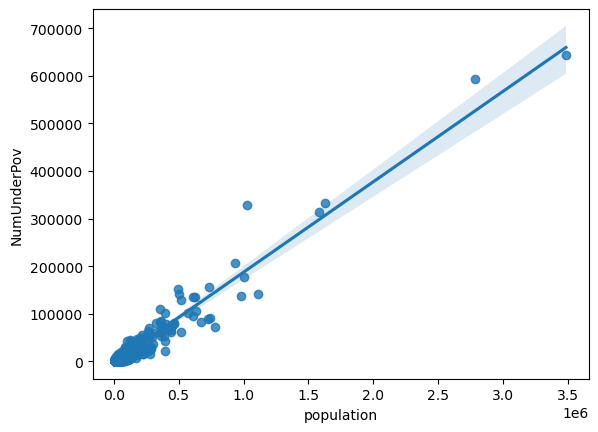

In [57]:
sns.regplot(x='population', y='NumUnderPov', data=df)

<Axes: xlabel='numbUrban', ylabel='murders'>

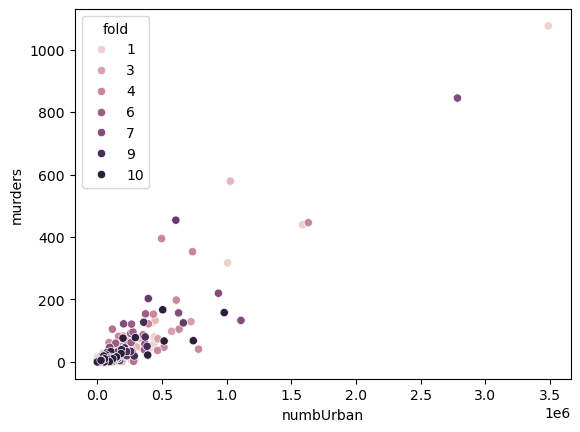

In [58]:
sns.scatterplot(x='numbUrban', y='murders', hue='fold', data=df)

<Axes: xlabel='PctHousOwnOcc', ylabel='HousVacant'>

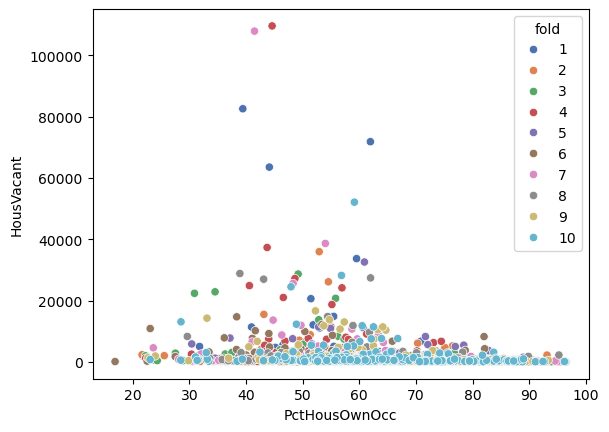

In [59]:
sns.scatterplot(x='PctHousOwnOcc', y='HousVacant', hue='fold', palette='deep', data=df)

<Axes: xlabel='PctUsePubTrans', ylabel='PopDens'>

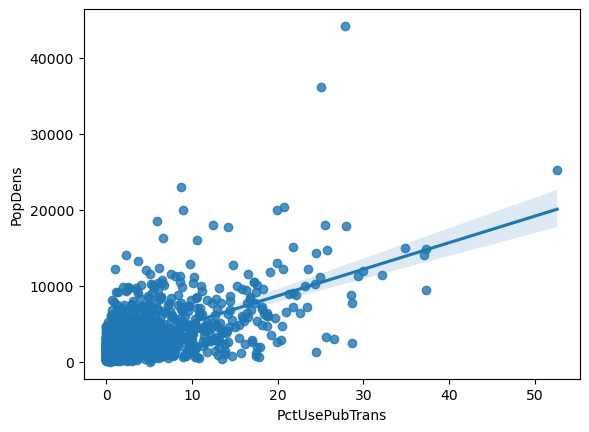

In [60]:
sns.regplot(x='PctUsePubTrans', y='PopDens', data=df)

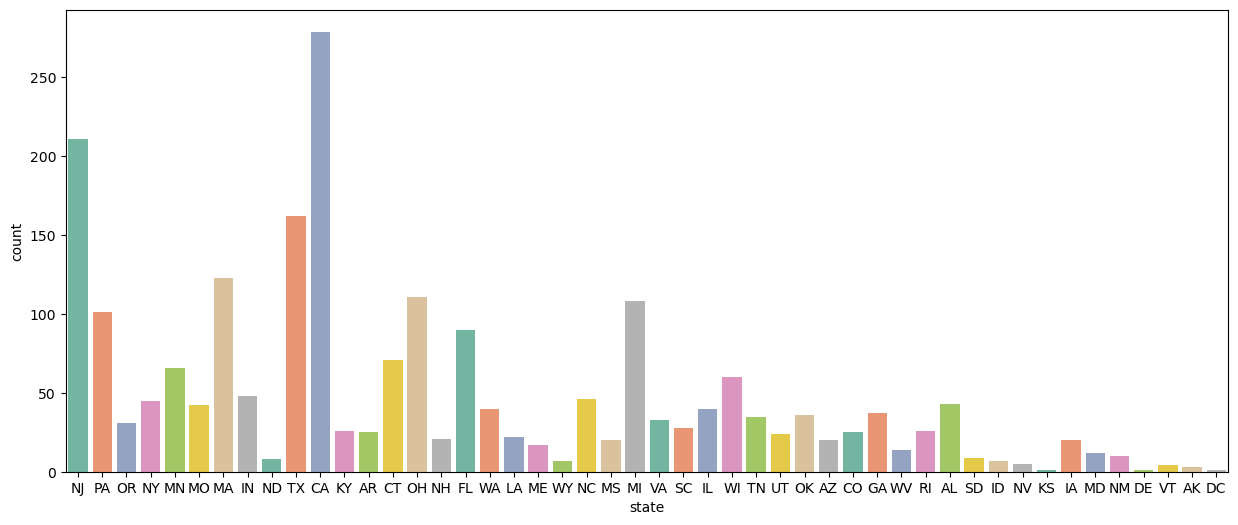

In [61]:
plt.figure(figsize=(15, 6))
sns.countplot(x='state', data = df, palette='Set2')
plt.show()

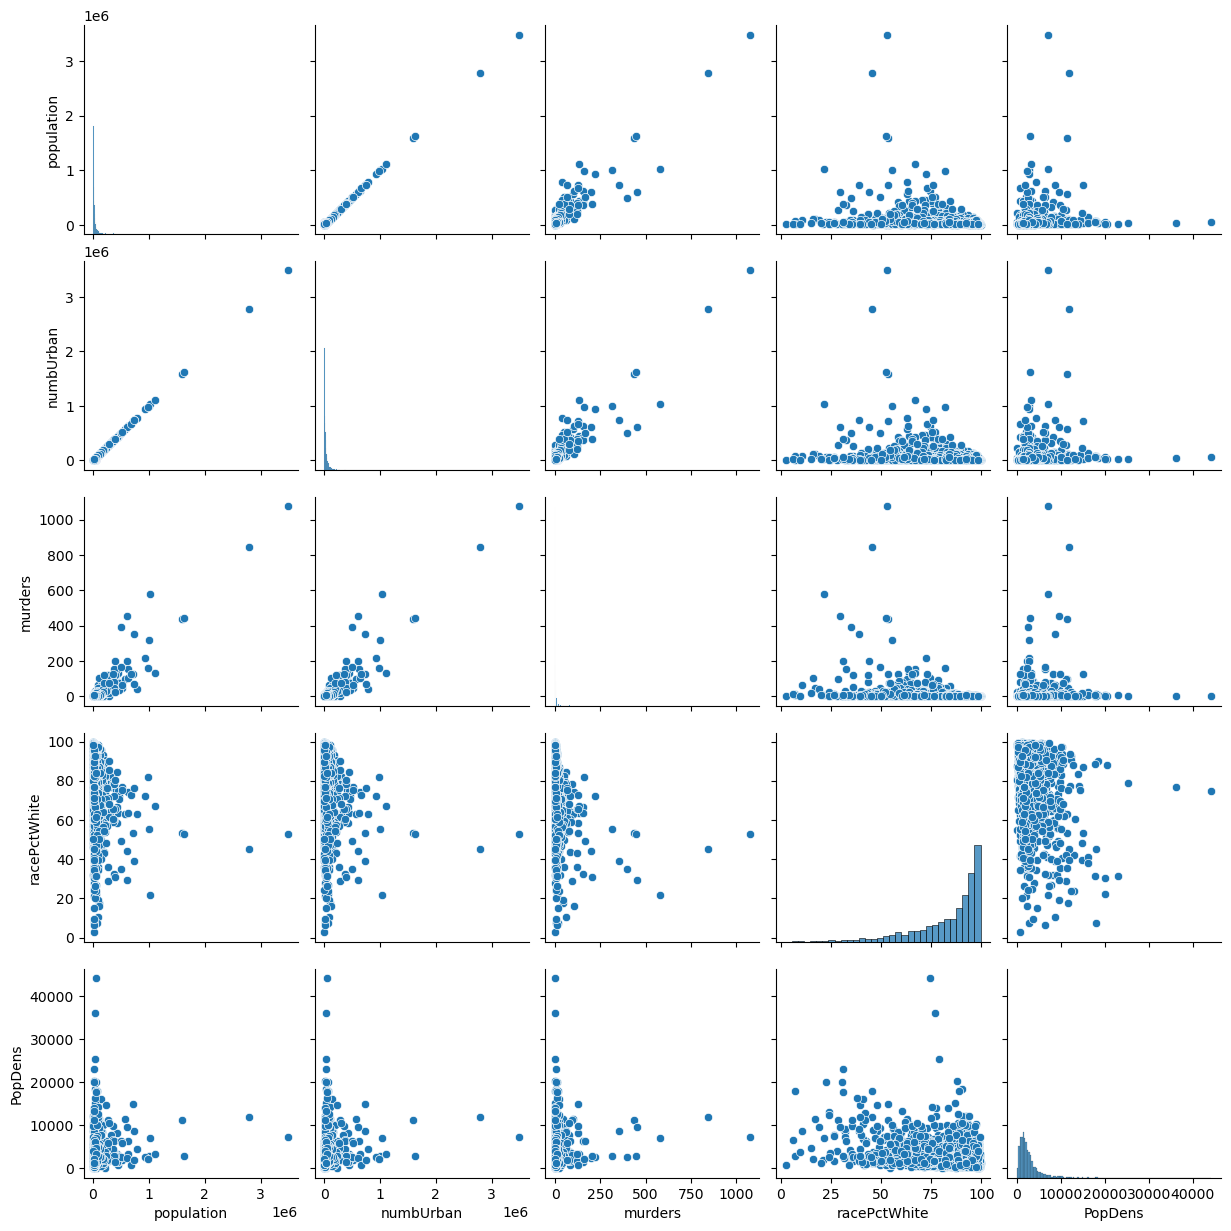

In [62]:
sns.pairplot(df[['population', 'numbUrban', 'murders', 'racePctWhite', 'PopDens']])
plt.show()

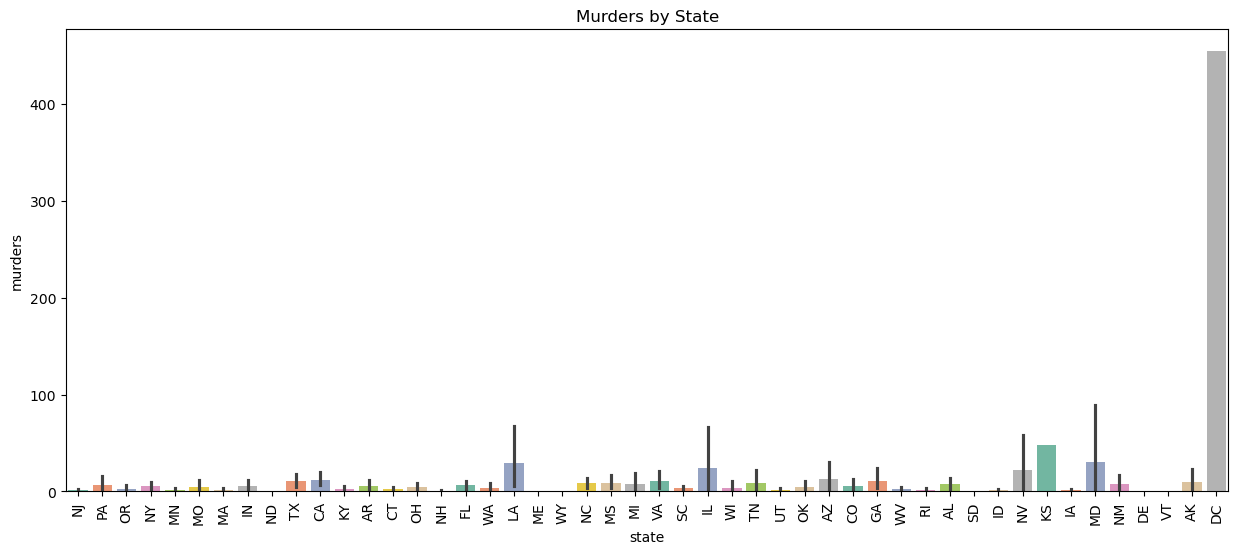

In [63]:
plt.figure(figsize=(15, 6))
sns.barplot(x='state', y='murders', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Murders by State')
plt.show()


In [64]:
df = df.drop(columns=['state'])


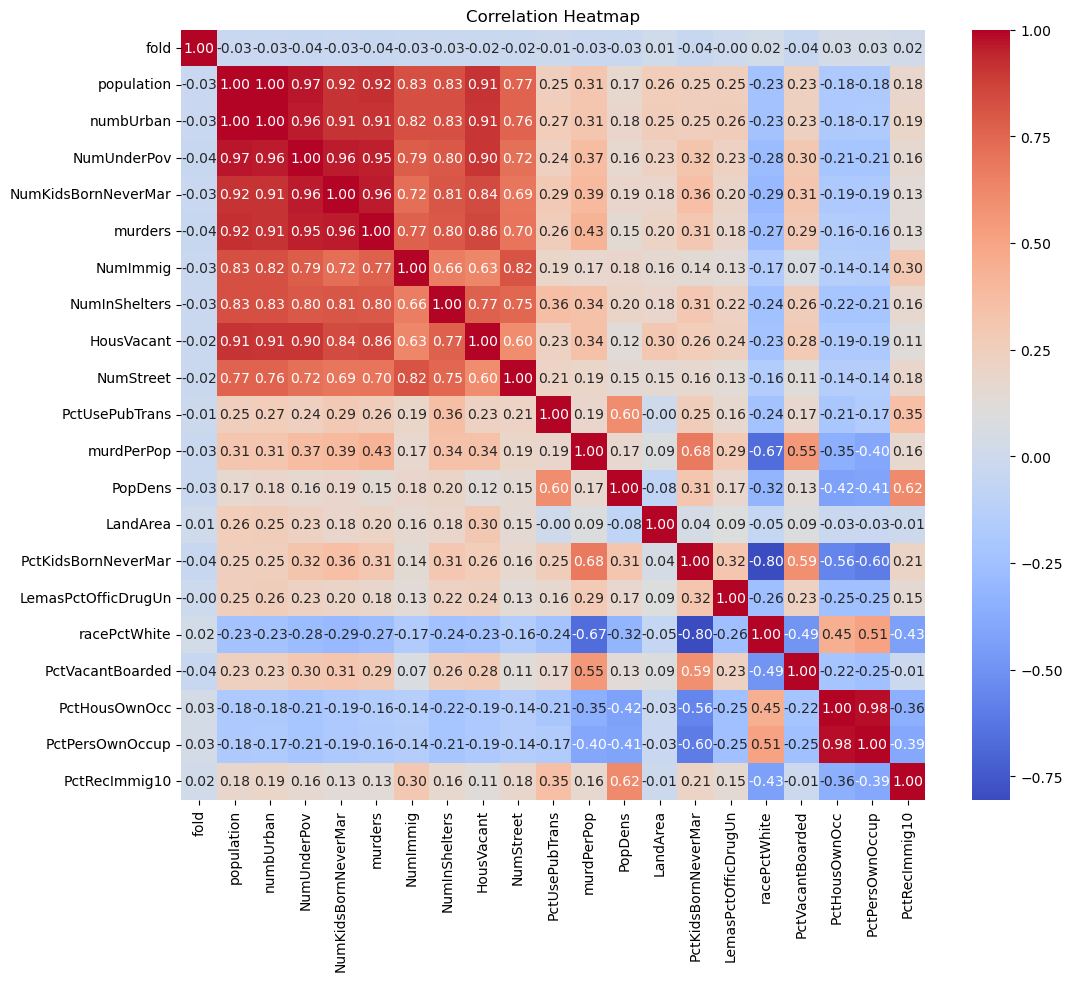

In [65]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [66]:
x = df.drop(columns=['population'])
y = df['population']


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

In [68]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [69]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

In [71]:
best_model = None
best_score = float('-inf')
best_model_name = ""

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"R2 Score of {model_name} = {r2:.4f}")
    
    if r2 > best_score:
        best_score = r2
        best_model_name = model_name
        best_model = model


R2 Score of Linear Regression = 0.9973
R2 Score of Lasso Regression = 0.9974
R2 Score of Decision Tree = -0.9180
R2 Score of Random Forest = 0.9290
R2 Score of Gradient Boosting = 0.9408
R2 Score of SVR = -0.0559
R2 Score of KNN = 0.6882


In [72]:
print(f"\nThe best model is: {best_model_name} with R²: {best_score:.4f}")


The best model is: Lasso Regression with R²: 0.9974


In [73]:
from sklearn.model_selection import GridSearchCV
lasso = best_model

param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'max_iter': [1000, 5000]    
}

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_lasso_model = grid_search.best_estimator_

print(f"Best hyperparameters found: {best_params}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best hyperparameters found: {'alpha': 10, 'max_iter': 1000}


In [74]:
y_pred = best_lasso_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 50175945.1905
Mean Absolute Error: 5271.8051
R² Score: 0.9974
